In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

import os 

In [3]:
laptopData = pd.read_csv("laptop_data.csv")
laptopData = laptopData.set_index('Laptop ID')

In [4]:
laptopData

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
Laptop ID,,,,,,,,,,,
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [5]:
laptopData.shape

(1303, 11)

In [6]:
laptopData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 122.2+ KB


In [7]:
laptopData.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


In [8]:
# Univarient analysis

<Axes: xlabel='Company', ylabel='count'>

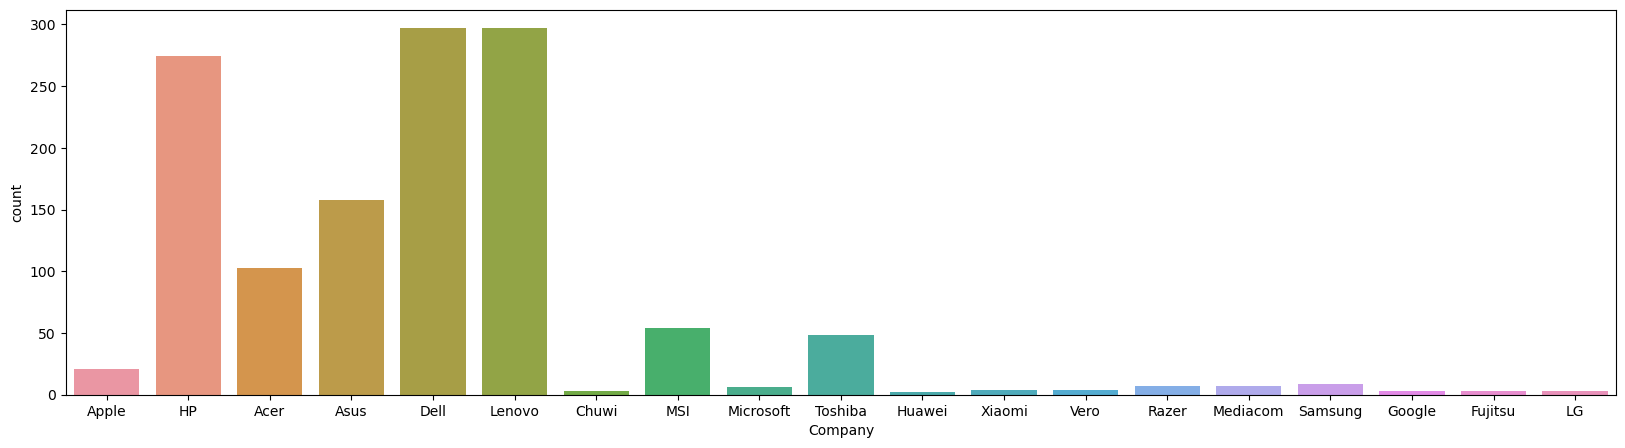

In [9]:
# laptop company
laptopData['Company'].value_counts()
fig, ax = plt.subplots(figsize= (20,5))
sns.countplot(x = "Company", data = laptopData,ax= ax)

In [10]:
laptopData['Price']

Laptop ID
0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

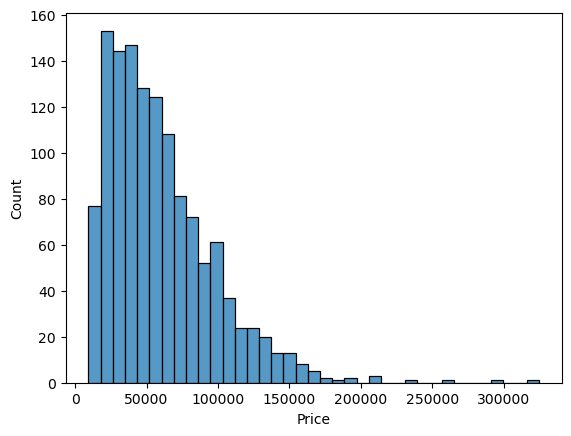

In [11]:
# Price dustribution 

price = sns.histplot(laptopData,x ='Price')
# price = sns.kdeplot(laptopData,x ='Price')

<Figure size 1500x700 with 0 Axes>

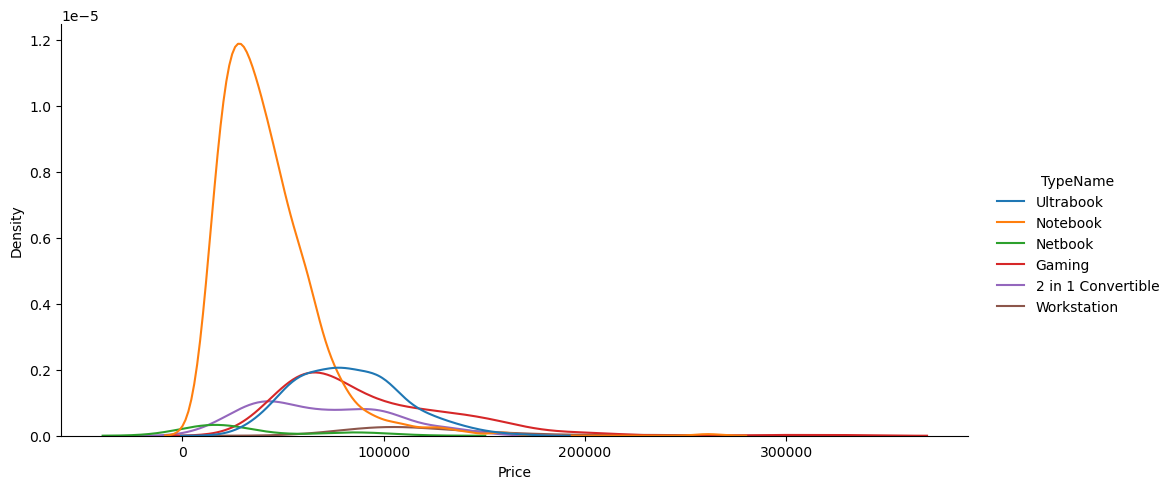

In [12]:
plt.figure(figsize=(15,7))
# fig, ax = plt.subplot(figsize = (12,5))
sns.displot(laptopData,x= 'Price',hue= 'TypeName', kind= "kde",height= 5, aspect= 2 )
plt.show()

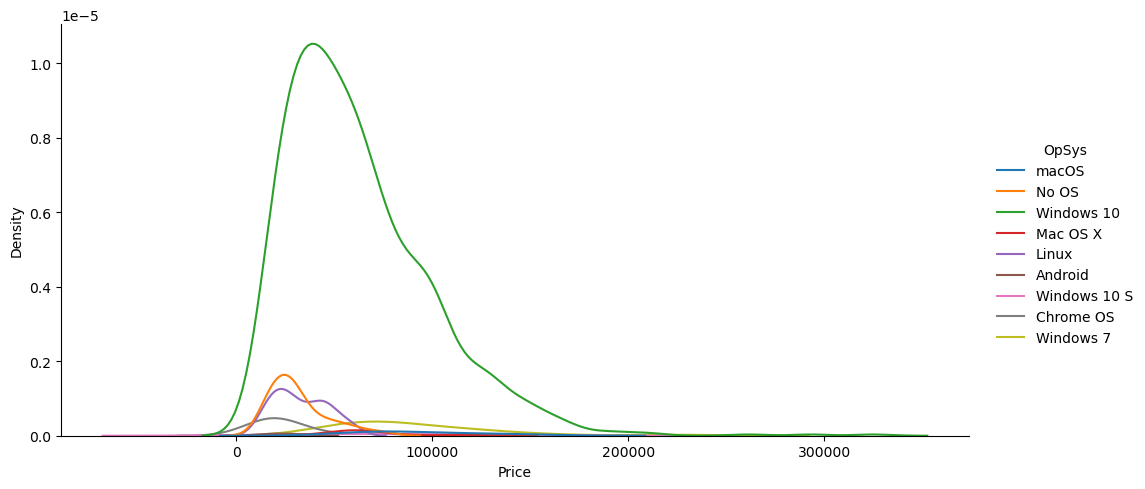

In [13]:
sns.displot(laptopData,x= 'Price',hue= 'OpSys', kind= "kde",height= 5, aspect= 2)

In [14]:
# EDA process 
laptopData['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [15]:
laptopData['Inches'].unique()

laptopData['Inches'].astype(float)

Laptop ID
0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: Inches, Length: 1303, dtype: float64

In [16]:
laptopData["ScreenResolution"].unique()


array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [17]:
laptopData["ScreenResolution"] = laptopData["ScreenResolution"].str.split(' ').str[-1]
laptopData["ScreenResolution"]

Laptop ID
0       2560x1600
1        1440x900
2       1920x1080
3       2880x1800
4       2560x1600
          ...    
1298    1920x1080
1299    3200x1800
1300     1366x768
1301     1366x768
1302     1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [18]:
laptopData['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [19]:
laptopData['Cpu'] = laptopData['Cpu'].str.split(' ').str[-1].str.replace("GHz"," ")
laptopData['Cpu_GHz'] = laptopData['Cpu'].astype(float)


In [20]:
laptopData['Cpu_GHz']

Laptop ID
0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu_GHz, Length: 1303, dtype: float64

In [21]:
laptopData['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [22]:
laptopData['Ram'] =  laptopData['Ram'].str.replace("GB"," ")
laptopData['Ram_GB'] = laptopData['Ram'].astype(int)

In [23]:
laptopData['Ram_GB'] 

Laptop ID
0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram_GB, Length: 1303, dtype: int32

In [24]:
laptopData['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [25]:
def memory_clean(val):
    # print("val is  : ",val)
    if   "GB" in val:
        return val.split(" ")[0].replace("GB"," ")
    if   "TB" in val:   
        return float(val.split(" ")[0].replace("TB"," "))*1000

In [26]:
laptopData['Memory_GB'] = laptopData.apply(lambda x:memory_clean(x['Memory']),axis =1)
laptopData['Memory_GB'] = laptopData['Memory_GB'].astype(int)

In [27]:
laptopData['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [28]:
laptopData['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [29]:
laptopData['Weight(Kg)'] = laptopData['Weight'].str.replace("kg", " ")
laptopData['Weight(Kg)'] = laptopData['Weight(Kg)'].astype(float)
laptopData['Weight(Kg)']

Laptop ID
0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight(Kg), Length: 1303, dtype: float64

In [30]:
laptopData['Price'] = laptopData['Price'].astype(int)

In [31]:
laptopData

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Cpu_GHz,Ram_GB,Memory_GB,Weight(Kg)
Laptop ID,,,,,,,,,,,,,,,
0,Apple,Ultrabook,13.3,2560x1600,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378,2.3,8,128,1.37
1,Apple,Ultrabook,13.3,1440x900,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895,1.8,8,128,1.34
2,HP,Notebook,15.6,1920x1080,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636,2.5,8,256,1.86
3,Apple,Ultrabook,15.4,2880x1800,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195,2.7,16,512,1.83
4,Apple,Ultrabook,13.3,2560x1600,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095,3.1,8,256,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,2.5,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992,2.5,4,128,1.80
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,2.5,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866,2.5,16,512,1.30
1300,Lenovo,Notebook,14.0,1366x768,1.6,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201,1.6,2,64,1.50


In [32]:
for header in laptopData.columns:
    print(header)

Company
TypeName
Inches
ScreenResolution
Cpu
Ram
Memory
Gpu
OpSys
Weight
Price
Cpu_GHz
Ram_GB
Memory_GB
Weight(Kg)


In [33]:
header_for_ml_model = [
"Company",
"TypeName",
"Cpu",
"Ram_GB",
"Memory_GB",
"OpSys",
"Weight(Kg)",
"Price"
]

In [34]:
laptopData = laptopData[header_for_ml_model]
laptopData

,Company,TypeName,Cpu,Ram_GB,Memory_GB,OpSys,Weight(Kg),Price
Laptop ID,,,,,,,,
0,Apple,Ultrabook,2.3,8,128,macOS,1.37,71378
1,Apple,Ultrabook,1.8,8,128,macOS,1.34,47895
2,HP,Notebook,2.5,8,256,No OS,1.86,30636
3,Apple,Ultrabook,2.7,16,512,macOS,1.83,135195
4,Apple,Ultrabook,3.1,8,256,macOS,1.37,96095
...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,2.5,4,128,Windows 10,1.80,33992
1299,Lenovo,2 in 1 Convertible,2.5,16,512,Windows 10,1.30,79866
1300,Lenovo,Notebook,1.6,2,64,Windows 10,1.50,12201


In [35]:
# Bivariat analysis
"""Now we will compare features aganist each other and will try to find corelation in between them"""

'Now we will compare features aganist each other and will try to find corelation in between them'

In [36]:
def correlation_heatmap(train):
    # find correlation
    correlations = train.corr()

    # Plot corelation between them
    fig,ax = plt.subplots(figsize =(16,16))
    sns.heatmap(correlations,vmax= 1.0,center= 0,fmt= ".2f", square= True, 
                linewidths= 0.5,annot=True,cbar_kws={"shrink":0.7}) 
    plt.show()

In [37]:
laptopData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     1303 non-null   object 
 1   TypeName    1303 non-null   object 
 2   Cpu         1303 non-null   object 
 3   Ram_GB      1303 non-null   int32  
 4   Memory_GB   1303 non-null   int32  
 5   OpSys       1303 non-null   object 
 6   Weight(Kg)  1303 non-null   float64
 7   Price       1303 non-null   int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 108.6+ KB


C:\Users\Ai\AppData\Local\Temp\ipykernel_13588\427458131.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()


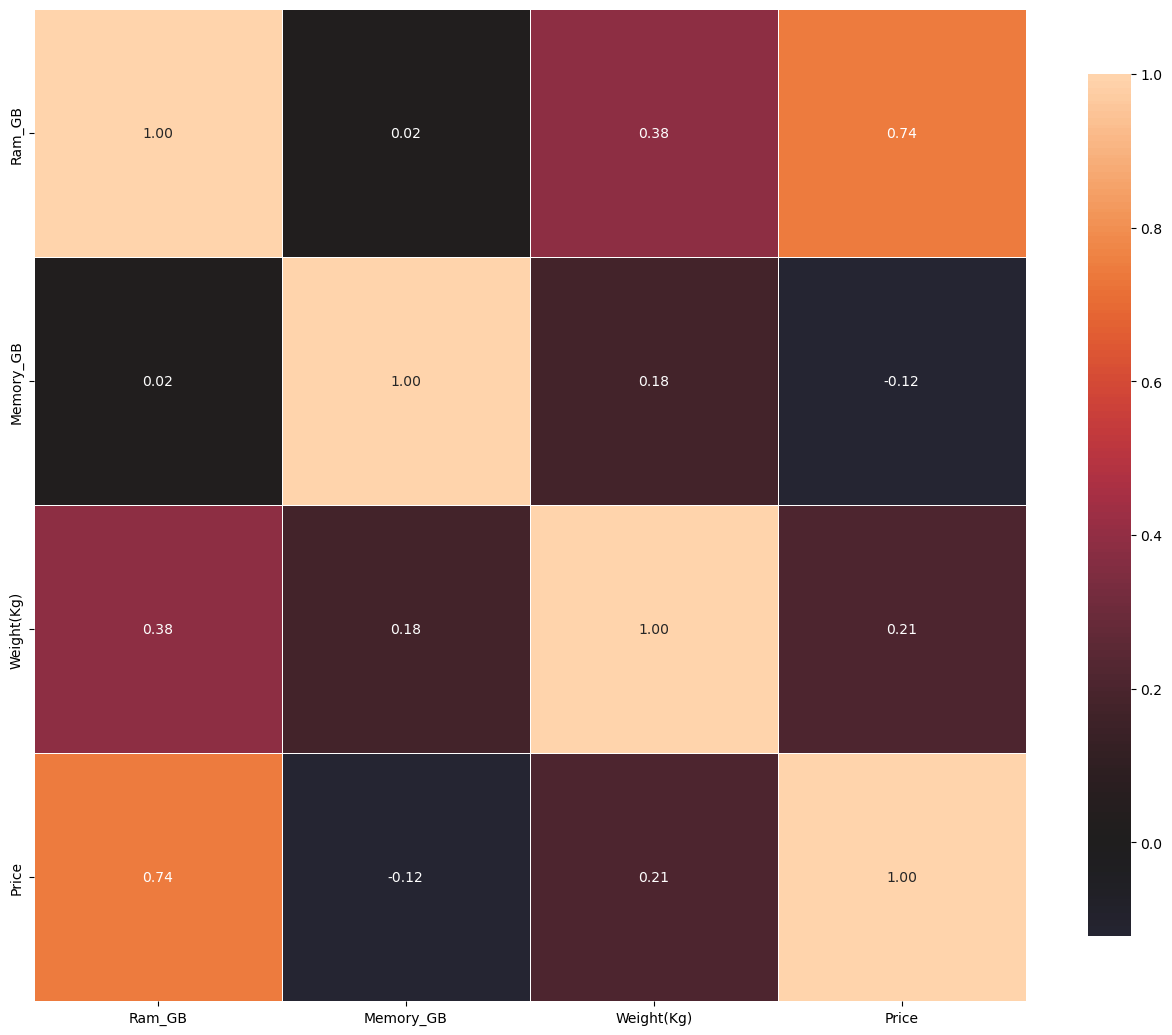

In [38]:
correlation_heatmap(laptopData)

In [39]:
laptopData.corr()

C:\Users\Ai\AppData\Local\Temp\ipykernel_13588\1853344762.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptopData.corr()


,Ram_GB,Memory_GB,Weight(Kg),Price
Ram_GB,1.000000,0.018271,0.383874,0.743007
Memory_GB,0.018271,1.000000,0.179962,-0.122366
Weight(Kg),0.383874,0.179962,1.000000,0.210370
Price,0.743007,-0.122366,0.210370,1.000000


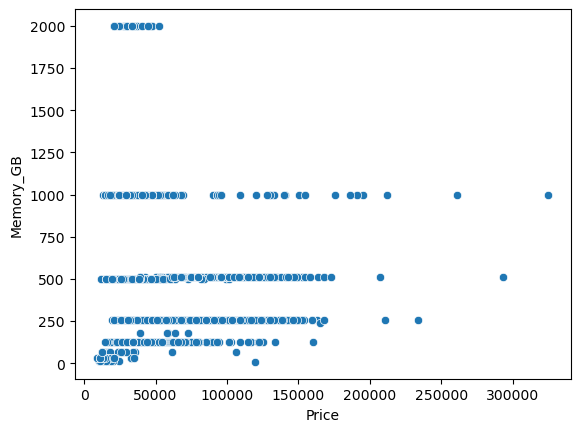

In [41]:
# Bivarient analysis

fig_size1 = (15,6)
# fig2, ax1 = plt.subplot(figure=plt.figure())
sns.scatterplot(data= laptopData,x = 'Price',y="Memory_GB")
plt.show()

<Axes: xlabel='Price', ylabel='Ram_GB'>

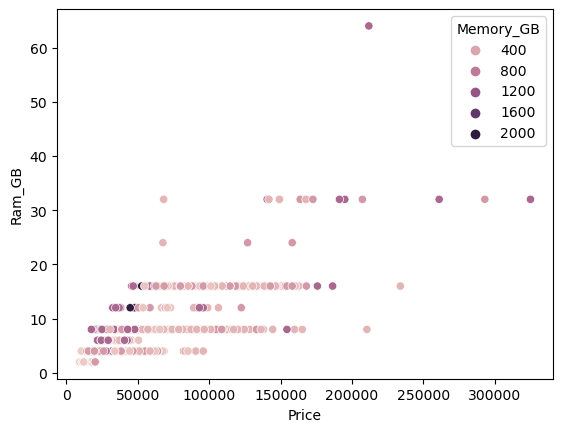

In [42]:
# Bivarient analysis

fig_size = (20,6)
# fig, ax = plt.subplots(figure= fig_size)
sns.scatterplot(data= laptopData,x = 'Price',y="Ram_GB",hue="Memory_GB",)

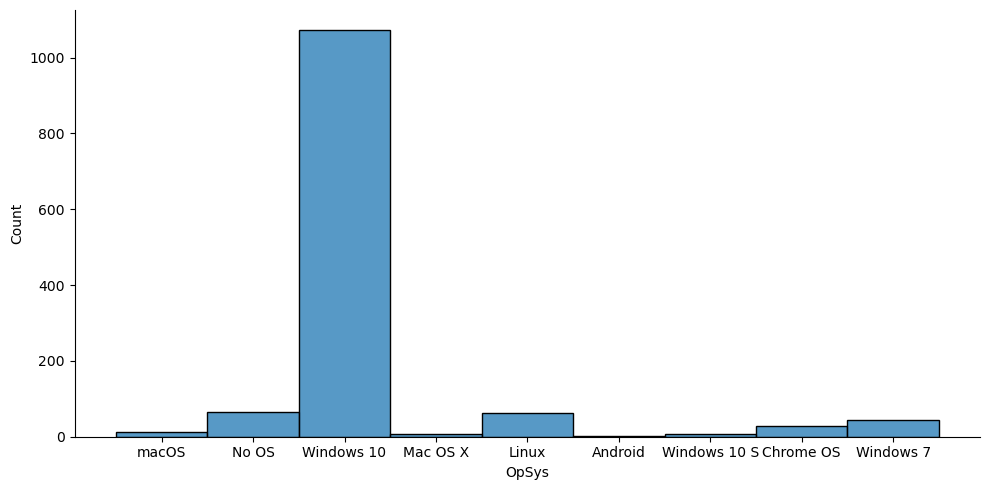

In [45]:

sns.displot(data = laptopData, x = 'OpSys' ,height= 5, aspect= 2)


In [46]:
# Split current data

In [48]:
laptopData.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram_GB', 'Memory_GB', 'OpSys',
       'Weight(Kg)', 'Price'],
      dtype='object')

In [50]:
X = laptopData.drop(['Price'], axis= 1)
Y = laptopData['Price']
X = X.select_dtypes(exclude=['object'])

In [53]:
X_test, X_train,Y_test,Y_train = train_test_split(X,Y,test_size=0.1, random_state=42)

In [60]:
# Train model
"""
1. Define model
2. fit model -> X_train,Y_train
3. Predt - X train
4. Mean square error
5. Hyperparameter
"""
SGDreg = SGDRegressor()
SGDreg.fit(X_train,Y_train)
pred = SGDreg.predict(X_train)
sgd_mse = mean_squared_error(Y_train, pred)
sgd_rmse = np.sqrt(sgd_mse)
sgd_mse

3.1587951383361347e+28

In [64]:
param_grid = {
    "alpha": 10.0**-np.arange(1,7),
    "loss": ["squared_loss", 'huber','epsilon_insensitive'],
    'penalty': ["l2",'l1','elasticnet'],
    "learning_rate":['constant','optimal','invscaling'],
    'max_iter': [1000,5000,10000]

}

grid_search = GridSearchCV(SGDreg,param_grid=param_grid)
grid_search.fit(X_train,Y_train)
print("Best estimator: \n"+str(grid_search.best_estimator_))
print("\nBest index:\n "+str(grid_search.best_index_))
print("\nBest param: \n"+str(grid_search.best_params_))
print("\nBest score:\n "+str(grid_search.best_score_))


Best estimator: /nSGDRegressor(alpha=0.01, learning_rate='optimal', loss='epsilon_insensitive',
             max_iter=5000, penalty='l1')

Best index:
 130

Best param: 
{'alpha': 0.01, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'max_iter': 5000, 'penalty': 'l1'}

Best score:
 -0.9662648950892635


c:\Users\Ai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ai\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ai\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 1583, in fit
    self._validate_params()
  File "c:\Users\Ai\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Ai\anaconda3\lib\site-

In [68]:
# KNN regressor

Kreg = KNeighborsRegressor()
Kreg.fit(X_train,Y_train)
pred = Kreg.predict(X_train)
mse = mean_squared_error(Y_train,pred)
k_rmse = np.sqrt(mse)

print("mse", mse)
print("Rmse", k_rmse)


mse 656536820.2186259
Rmse 25622.974460796428


In [75]:
param_grid = {
"n_neighbours":np.arange(1,12,2),
'weights': ['uniform','distance']
}

# grid_search = GridSearchCV(Kreg, param_grid)
# grid_search.fit(X_train,Y_train)

# print("Best score: ", str(grid_search.best_score_))

In [72]:
np.arange(1,12,2)


array([ 1,  3,  5,  7,  9, 11])